In [133]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
import numpy as np
import skimage.io as io

import matplotlib
%matplotlib inline

import utils, morph

In [135]:
from pathlib import Path
data = Path("input")
data.mkdir(parents=True, exist_ok=True)

In [136]:
# matplotlib.use("TkAgg")
# matplotlib.use("Tk")
# matplotlib.interactive(True)

# Alignment

In [137]:
%matplotlib tk
if not Path("input/me_align.pkl").exists():
    me_align_pts = utils.pick_points("input/me_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(me_align_pts, "input/me_align.pkl")
me_align_pts = utils.load_points("input/me_align.pkl")

if not Path("input/iu_align.pkl").exists():
    iu_align_pts = utils.pick_points("input/iu_original.jpg", 2, APPEND_CORNERS=False)
    utils.save_points(iu_align_pts, "input/iu_align.pkl")
iu_align_pts = utils.load_points("input/iu_align.pkl")

In [138]:
%matplotlib inline

In [139]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

In [140]:
iu_align_pts

array([[323.27199216, 531.44349544],
       [572.88686297, 533.47288463]])

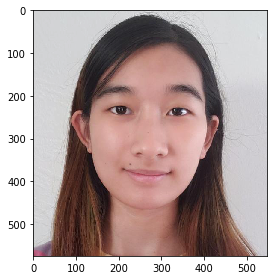

In [141]:
me = utils.to_img_arr("input/me.jpg")
io.imshow(me)

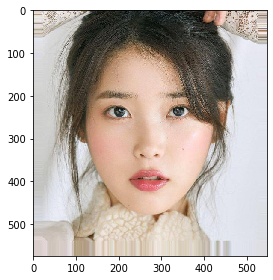

In [142]:
iu = utils.to_img_arr("input/iu.jpg")
io.imshow(iu)

# Triangulation

In [143]:
NUM_POINTS = 59

In [144]:
%matplotlib tk
if not Path("input/me.pkl").exists():
    me_pts = utils.pick_points("input/me.jpg", NUM_POINTS)
    utils.save_points(me_pts, "input/me.pkl")
me_pts = utils.load_points("input/me.pkl")

In [145]:
%matplotlib tk
if not Path("input/iu.pkl").exists():
    iu_pts = utils.pick_points("input/iu.jpg", NUM_POINTS)
    utils.save_points(iu_pts, "input/iu.pkl")
iu_pts = utils.load_points("input/iu.pkl")

# Compute Morphing

In [146]:
%matplotlib inline

In [157]:
import morph
middle_img, triangulation = morph.compute_middle_object(me, iu, me_pts, iu_pts, alpha=0.5)
io.imshow(middle_img)

(27179,) [ -5  -4  -3 ... 233 228 229]
(2376,) [-5 -5 -5 ... -5 -5 -5]
(37867,) [242 243 240 ... 537 538 539]
(2258,) [-4 -4 -4 ...  9  9  9]
(6751,) [541 540 541 ... 358 359 356]
(3524,) [ 9  9  9 ... -4 -4 -4]
(5339,) [44 45 42 ... -3 -4 -4]
(6211,) [236 237 238 ...  -3  -2  -4]
(5038,) [95 96 97 ... -2 -3 -4]
(11667,) [370 371 372 ... 540 541 541]


IndexError: index 547 is out of bounds for axis 1 with size 547

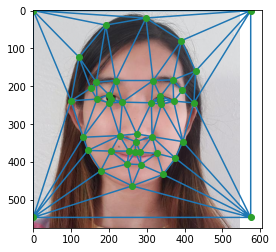

In [18]:
morph.plot_tri_mesh(me, me_pts, triangulation)

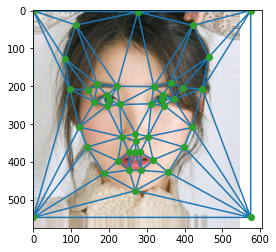

In [19]:
morph.plot_tri_mesh(iu, iu_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.5624918937683105
Frame 2 morph time with alpha 0.010101010101010102: 0.5834851264953613
Frame 3 morph time with alpha 0.020202020202020204: 0.5783867835998535
Frame 4 morph time with alpha 0.030303030303030304: 0.5626709461212158
Frame 5 morph time with alpha 0.04040404040404041: 0.5728588104248047
Frame 6 morph time with alpha 0.05050505050505051: 0.5606918334960938
Frame 7 morph time with alpha 0.06060606060606061: 0.5620760917663574
Frame 8 morph time with alpha 0.07070707070707072: 0.5636820793151855
Frame 9 morph time with alpha 0.08080808080808081: 0.5745611190795898
Frame 10 morph time with alpha 0.09090909090909091: 0.5601887702941895
Frame 11 morph time with alpha 0.10101010101010102: 0.5649499893188477
Frame 12 morph time with alpha 0.11111111111111112: 0.5603609085083008
Frame 13 morph time with alpha 0.12121212121212122: 0.5590169429779053
Frame 14 morph time with alpha 0.13131313131313133: 0.5725469589233398
Frame 15 morph time with alp

IndexError: index 547 is out of bounds for axis 1 with size 547

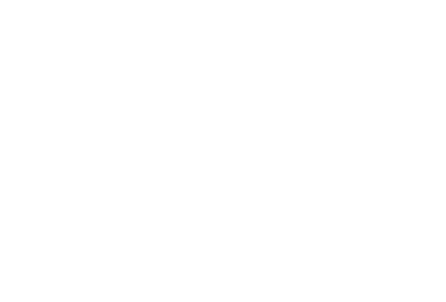

In [116]:
video_path = Path("output/me_iu.mov")
video_frames = morph.compute_morph_video(me, iu, me_pts, iu_pts, video_path, num_frames=100, fps=25)

# Population Mean

In [74]:
import population_mean as pop

In [75]:
from my_types import to_img_arr
import matplotlib.pyplot as plt
import utils
man = to_img_arr("imm_face_db/01-1m.jpg")
man.shape

(480, 640, 3)

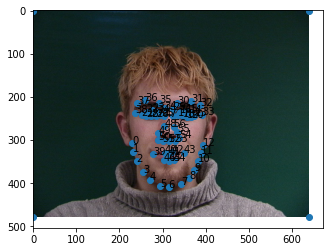

In [76]:
points = utils.load_points_from_asf("imm_face_db/01-1m.asf", APPEND_CORNERS=True)
fig, ax = plt.subplots()
plt.imshow(to_img_arr("imm_face_db/01-1m.jpg"))
ax.scatter(points[:, 0], points[:, 1])
n = np.arange(0,57)
for i, txt in enumerate(n):
    ax.annotate(txt, (points[:, 0][i], points[:, 1][i]))
# img = "imm_face_db/01-1m.jpg"
# points = "imm_face_db/01-1m.asf"
# utils.plot_points(img, points)

eye coordinates: [355.9838848 247.5944976] [274.048384  245.6596464]
scaling by 1.6685305665136434


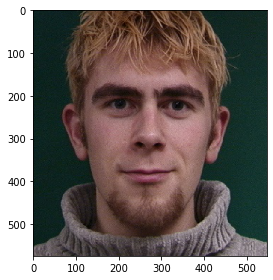

In [77]:
points = utils.load_points_from_asf("imm_face_db/01-1m.asf", APPEND_CORNERS=True)
# print(points)
test, _ = utils.align_img("imm_face_db/01-1m.jpg", points, left_idx=19, right_idx=27)
io.imshow(test)

In [78]:
pop_dir = Path("imm_face_db")

all_imgs = list(Path(pop_dir).glob("*-1*.jpg"))
all_pts = list(Path(pop_dir).glob("*-1*.asf"))

male_imgs = list(Path(pop_dir).glob("*-1m.jpg"))
male_pts = list(Path(pop_dir).glob("*-1m.asf"))

female_imgs = list(Path(pop_dir).glob("*-1f.jpg"))
female_pts = list(Path(pop_dir).glob("*-1f.asf"))

In [79]:
population_mean = pop.compute_population_mean(all_imgs, all_pts)

KeyboardInterrupt: 

# Bells and Whistles

In [25]:
%matplotlib tk
if not Path("input/im_ugly.pkl").exists():
    other_pts = utils.pick_points("input/im_ugly.jpg", NUM_POINTS)
    utils.save_points(other_pts, "input/im_ugly.pkl")
other_pts = utils.load_points("input/im_ugly.pkl")

Please select 59 points in image.
Picked 59 points successfully.


In [33]:
other = utils.to_img_arr("input/im_ugly.jpg")

In [38]:
%matplotlib inline
middle_img, triangulation = morph.compute_middle_object(me, other, me_pts, other_pts, alpha=0.5)
io.imshow(middle_img)

warp im1
33529 33529
33529 33529


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
morph.plot_tri_mesh(other, other_pts, triangulation)

Frame 1 morph time with alpha 0.0: 0.4809732437133789
Frame 2 morph time with alpha 0.010101010101010102: 0.5343279838562012
Frame 3 morph time with alpha 0.020202020202020204: 0.5129489898681641
Frame 4 morph time with alpha 0.030303030303030304: 0.48418712615966797
Frame 5 morph time with alpha 0.04040404040404041: 0.5142590999603271
Frame 6 morph time with alpha 0.05050505050505051: 0.557697057723999
Frame 7 morph time with alpha 0.06060606060606061: 0.5096790790557861
Frame 8 morph time with alpha 0.07070707070707072: 0.4987630844116211
Frame 9 morph time with alpha 0.08080808080808081: 0.4881100654602051
Frame 10 morph time with alpha 0.09090909090909091: 0.4861299991607666
Frame 11 morph time with alpha 0.10101010101010102: 0.48351407051086426
Frame 12 morph time with alpha 0.11111111111111112: 0.4797799587249756
Frame 13 morph time with alpha 0.12121212121212122: 0.4861931800842285
Frame 14 morph time with alpha 0.13131313131313133: 0.54836106300354
Frame 15 morph time with alph

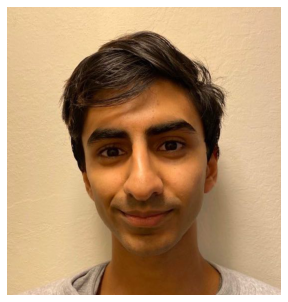

In [34]:
video_path = Path("output/bells.mov")
video_frames = morph.compute_morph_video(
    me, other, me_pts, other_pts, video_path, num_frames=100, fps=25, boomerang=False
)